## FULL EDA PIPELINE ON TITATNIC DATASET

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load data
df = sns.load_dataset('titanic')

In [41]:
#Data cleaning

#Make a copy of the data
df_copy = df.copy()
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [42]:
##Checking for missing values
df_copy.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: xlabel='age', ylabel='Count'>

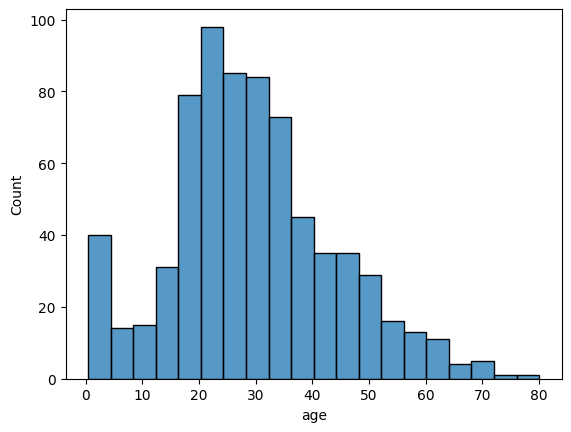

In [43]:
sns.histplot(df_copy['age'])
# plt.hist(df_copy('Age'))

In [44]:
df_copy['age'].mean(), df_copy['age'].median()

(np.float64(29.69911764705882), 28.0)

In [45]:
##Based on above, we can use median to fill in missing values (mean would be affected by outliers)

df_copy['age'].fillna(df_copy['age'].median(), inplace = True)
df_copy

<ipython-input-45-6d605388d279>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['age'].fillna(df_copy['age'].median(), inplace = True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [46]:
df_copy.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [47]:
##Dropping the column deck

df_copy.drop(columns={'deck'}, inplace = True)
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [48]:
df_copy.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [49]:
##Accesing through loc

df_copy.iloc[888]

,888
survived,0
pclass,3
sex,female
age,28.0
sibsp,1
parch,2
fare,23.45
embarked,S
class,Third
who,woman


In [30]:
# df_copy.loc[888, 'age'] #(of index was categorical)

np.float64(nan)

In [50]:
df_copy['embarked'].fillna(df_copy['embarked'].mode()[0], inplace = True)

<ipython-input-50-a97360f6de78>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['embarked'].fillna(df_copy['embarked'].mode()[0], inplace = True)


In [51]:
df_copy.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [52]:
df_copy.drop(columns={'embarked'}, inplace = True)
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


In [53]:
df_copy['embark_town'].fillna(df_copy['embark_town'].mode()[0], inplace = True)

<ipython-input-53-776e8b39fa33>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['embark_town'].fillna(df_copy['embark_town'].mode()[0], inplace = True)


In [54]:
df_copy.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
class,0
who,0
adult_male,0


In [55]:
df_copy.duplicated().sum()

np.int64(116)

In [56]:
df_copy.drop_duplicates(inplace = True)

In [57]:
## encoding categorical column
df_copy['sex'] = df_copy['sex'].map({'male':0, 'female':1})
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,Third,woman,False,Queenstown,no,False
887,1,1,1,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,0,3,1,28.0,1,2,23.4500,Third,woman,False,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


In [58]:
#Feature engineering
#Scale numerocal feature (basic standardization)

df_copy['age_scaled'] = (df_copy['age'] - df_copy['age'].mean())/df_copy['age'].std()
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,age_scaled
0,0,3,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,-0.550704
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,0.611550
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,-0.260140
3,1,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,0.393627
4,0,3,0,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0.393627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,Third,woman,False,Queenstown,no,False,0.684191
887,1,1,1,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,-0.768626
888,0,3,1,28.0,1,2,23.4500,Third,woman,False,Southampton,no,False,-0.114859
889,1,1,0,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,-0.260140


In [59]:
df_copy['age_scaled'].max(), df_copy['age_scaled'].min()

(3.662465476719129, -2.1182934474692794)

In [60]:
##Outlier handling - remove extreme fare values

q1 = df_copy['fare'].quantile(0.25)
q3 = df_copy['fare'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

df_copy2 = df_copy[(df_copy['fare'] < upper_limit) & (df_copy['fare'] > lower_limit)]

In [62]:
df_copy.shape[0] - df_copy2.shape[0]

102